<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/7_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 7.42


In [9]:
!pip install whit-phys-util

In [17]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import whit_phys_util as buc

Mounted at /content/drive


In [19]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


In [11]:
#constants
R = 1
g = 1
delta = 0
A = 1*(np.pi/180)
A2 = 10*A
omega = np.sqrt(2)
eps_0 = 1*(np.pi/180) #1 degree
eps_0_2 = 10*eps_0 # 10 degrees 
theta_0 = np.arccos(1/omega**2) 
theta_init = theta_0 + eps_0  
theta_init_2 = theta_0 + eps_0_2
Omega_p = np.sqrt((omega**2) - (1/omega**2))

Euqation of motion for a bead on a spinning hoop. $$\ddot{\theta} = (\omega^2\cos\theta - g/R)\sin\theta$$

Approximate solution found analytically for small oscillations $$ \theta(t) = \theta_0 + A\cos(\Omega't - \delta)$$

where $\theta_0$ is the position of equilibrium, and $$\Omega' = \sqrt(\omega^2 - (g/\omega R)^2)$$

In [12]:
def theta_apprx(t,theta_0,A,Omega_p,delta):
  return theta_0 + A*np.cos(Omega_p*t - delta)

In [13]:
def f(u,t):
  return(u[1],(omega**2*np.cos(u[0]) - 1)*np.sin(u[0]))

In [14]:
t_span = np.linspace(0,10,1001)
u0 = [theta_init,0]
u0_2 = [theta_init_2,0]
us = odeint(f,u0,t_span)
us_2 = odeint(f,u0_2,t_span)

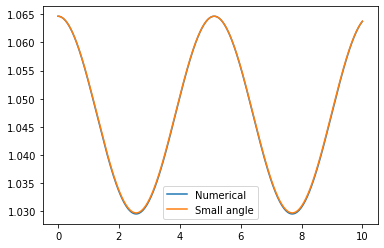

In [15]:
fig, ax = plt.subplots()
ax.plot(t_span, us[:,0]);
ax.plot(t_span, theta_apprx(t_span,theta_0,A,Omega_p,delta));
ax.legend(['Numerical','Small angle']);

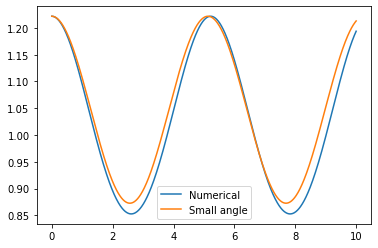

In [16]:
fig2, ax2 = plt.subplots()
ax2.plot(t_span, us_2[:,0]);
ax2.plot(t_span, theta_apprx(t_span,theta_0,A2,Omega_p,delta));
ax2.legend(['Numerical','Small angle']);

When epsilon is one degree there is almost perfect agreement between the amsll angle approximation and the numerical solution, as expected, as a one degree deviation from equilibrium is in fact a small angle. When the deviation is increased to 10 degrees we see slight agreement, but there is significant deviation by the approximation compared to the numerical solution. 